In [1]:
import spacy


Creating blank language object and tokenize words in a sentence

In [20]:
doc = nlp('''"Let's go to N.Y.!"''')

for token in doc:
    print(token)

"
Let
's
go
to
N.Y.
!
"


In [21]:
nlp = spacy.blank("en")

doc = nlp("Dr. Strange loves pav bhaji of mumbai as it costs only 2$ per plate.")

for token in doc:
    print(token)

Dr.
Strange
loves
pav
bhaji
of
mumbai
as
it
costs
only
2
$
per
plate
.


Creating blank language object gives a tokenizer and an empty pipeline.

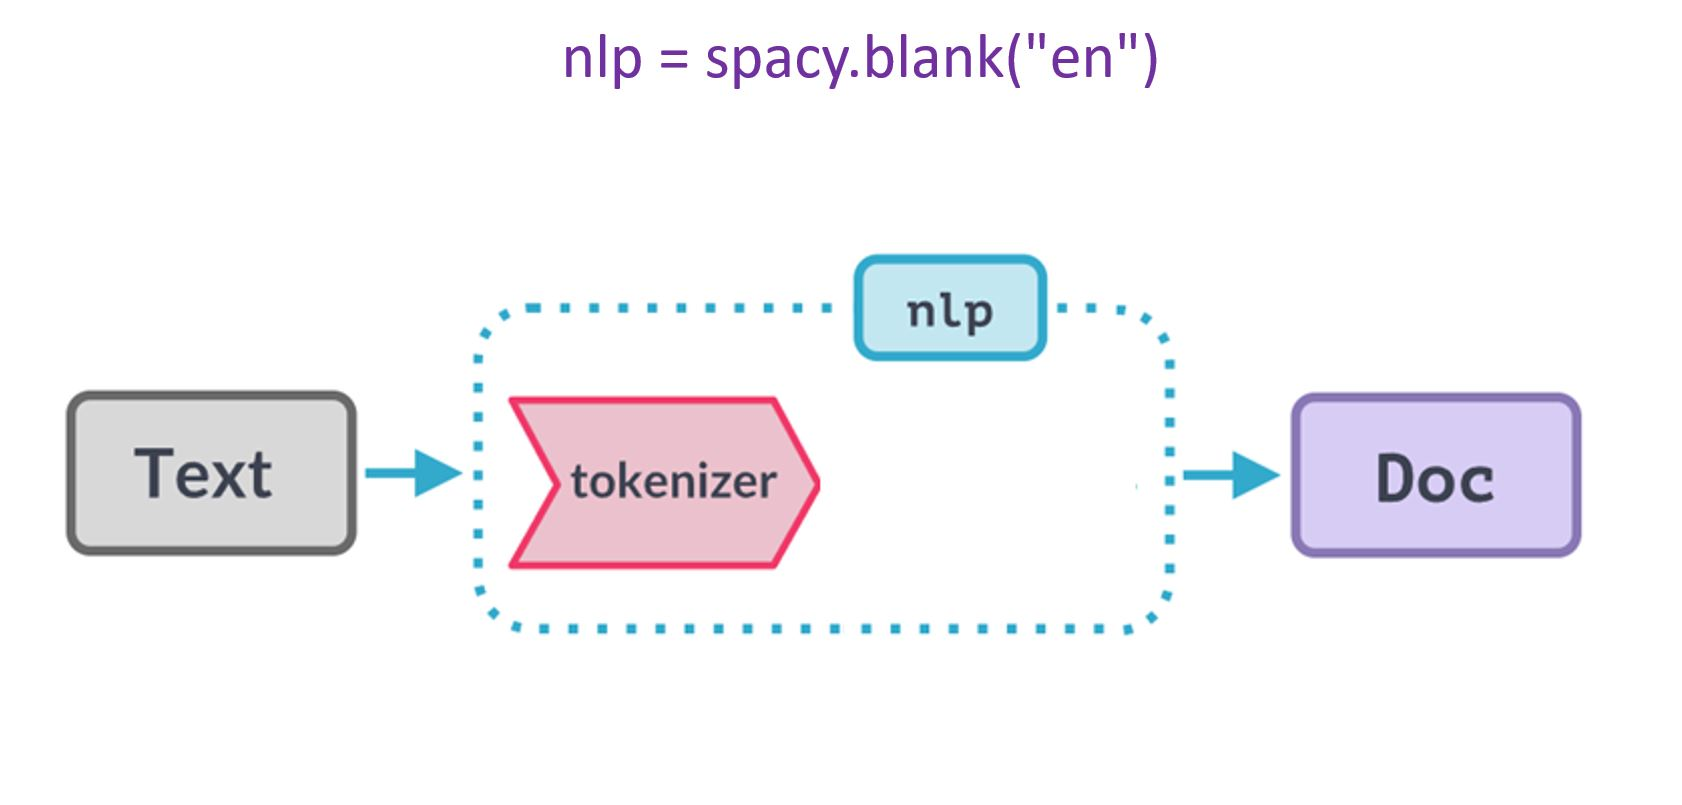

# Using index to grab tokens

In [13]:
doc[0]

Dr.

In [22]:
doc[-1]

.

In [14]:
token = doc[1]
token.text

'Strange'

In [15]:
dir(token)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_dep',
 'has_extension',
 'has_head',
 'has_morph',
 'has_vector',
 'head',
 'i',
 'idx',
 'iob_strings',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'le

In [16]:
type(nlp)

spacy.lang.en.English

In [17]:
type(doc)

spacy.tokens.doc.Doc

In [18]:
type(token)

spacy.tokens.token.Token

In [19]:
nlp.pipe_names

[]

# Span object: 
Span means a sun string from that string it is same as slicing in python.

In [23]:
span = doc[0:5]
span

Dr. Strange loves pav bhaji

In [24]:
type(span)

spacy.tokens.span.Span

# Token attributes

In [25]:
doc = nlp("Tony gave two $ to Peter.")

In [26]:
token0 = doc[0]
token0

Tony

In [27]:
token0.is_alpha

True

In [28]:
token0.like_num

False

In [29]:
token2 = doc[2]
token2

two

In [30]:
token2.like_num

True

In [31]:
token3 = doc[3]
token3

$

In [32]:
token3.like_num

False

In [33]:
token3.is_currency

True

In [34]:
# Loop through each token in the document
for token in doc:
    # Print the token itself, followed by details about it:
    # "index" (token's position in the document),
    # "is_alpha" (True if the token consists of alphabetic characters only),
    # "is_punct" (True if the token is punctuation),
    # "like_num" (True if the token resembles a number, like "10" or "ten"),
    # "is_currency" (True if the token represents a currency symbol like "$" or "€").
    print(
        token, "==>", 
        "index: ", token.i, 
        "is_alpha:", token.is_alpha, 
        "is_punct:", token.is_punct, 
        "like_num:", token.like_num, 
        "is_currency:", token.is_currency,
    )


Tony ==> index:  0 is_alpha: True is_punct: False like_num: False is_currency: False
gave ==> index:  1 is_alpha: True is_punct: False like_num: False is_currency: False
two ==> index:  2 is_alpha: True is_punct: False like_num: True is_currency: False
$ ==> index:  3 is_alpha: False is_punct: False like_num: False is_currency: True
to ==> index:  4 is_alpha: True is_punct: False like_num: False is_currency: False
Peter ==> index:  5 is_alpha: True is_punct: False like_num: False is_currency: False
. ==> index:  6 is_alpha: False is_punct: True like_num: False is_currency: False


# Collecting email ids of students from students information sheet

In [37]:
with open("students.txt") as f:
    text = f.readlines()
text

['Dayton high school, 8th grade students information\n',
 '==================================================\n',
 '\n',
 'Name\tbirth day   \temail\n',
 '-----\t------------\t------\n',
 'Virat   5 June, 1882    virat@kohli.com\n',
 'Maria\t12 April, 2001  maria@sharapova.com\n',
 'Serena  24 June, 1998   serena@williams.com \n',
 'Joe      1 May, 1997    joe@root.com\n',
 '\n',
 '\n',
 '\n']

In [38]:
# separating everything by space, it will join all the elements by list and use space as delimiter. 
# in between the list element when they join it will use the space in betwwen.
text = " ".join(text)
text

'Dayton high school, 8th grade students information\n ==================================================\n \n Name\tbirth day   \temail\n -----\t------------\t------\n Virat   5 June, 1882    virat@kohli.com\n Maria\t12 April, 2001  maria@sharapova.com\n Serena  24 June, 1998   serena@williams.com \n Joe      1 May, 1997    joe@root.com\n \n \n \n'

In [39]:
doc = nlp(text)
emails = []
for token in doc:
    if token.like_email:
        emails.append(token.text)
emails  

['virat@kohli.com',
 'maria@sharapova.com',
 'serena@williams.com',
 'joe@root.com']

# Support in other languages

Spacy support many language models. Some of them do not support pipelines though! https://spacy.io/usage/models#languages

In [40]:
nlp = spacy.blank("hi")
doc = nlp("भैया जी! 5000 ₹ उधार थे वो वापस देदो")
for token in doc:
    print(token, token.is_currency)

भैया False
जी False
! False
5000 False
₹ True
उधार False
थे False
वो False
वापस False
देदो False


In [46]:
nlp = spacy.blank("hi")
doc = nlp("मेरा नाम सिया है।")
for token in doc:
    print(token, token.is_currency)

मेरा False
नाम False
सिया False
है False
। False


# Customizing tokenizer

In [47]:
# Import the ORTH symbol, which represents the orthographic (surface) form of a token
from spacy.symbols import ORTH

# Create a blank NLP pipeline for English (no pre-trained models or tokenization rules)
nlp = spacy.blank("en")

# Process a sample sentence to create a document object
doc = nlp("gimme double cheese extra large healthy pizza")

# Create a list of token texts from the document by looping through each token and accessing its text
tokens = [token.text for token in doc]

# Output the list of token texts
tokens


['gimme', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza']

In [48]:
# Import the ORTH symbol to define the orthographic form of tokens
from spacy.symbols import ORTH

# Create a blank NLP pipeline for English (no pre-trained models or tokenization rules)
nlp = spacy.blank("en")

# Add a special case to the tokenizer for the word "gimme", splitting it into "gim" and "me"
# This means "gimme" will be tokenized as two separate tokens: "gim" and "me"
nlp.tokenizer.add_special_case("gimme", [
    {ORTH: "gim"},
    {ORTH: "me"},
])

# Process a sample sentence with the custom tokenization rule applied
doc = nlp("gimme double cheese extra large healthy pizza")

# Create a list of token texts from the document by looping through each token and accessing its text
tokens = [token.text for token in doc]

# Output the list of token texts
tokens


['gim', 'me', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza']

# Sentence Tokenization or Segmentation

In [51]:
# Import the necessary spaCy components
import spacy
# Import Sentencizer from spaCy's pipeline module, which is used for sentence boundary detection
from spacy.pipeline import Sentencizer

# Create a blank NLP pipeline for English (no pre-trained models or tokenization rules)
nlp = spacy.blank("en")

# Add the sentencizer to the pipeline to detect sentence boundaries.
# The sentencizer marks the start and end of sentences using punctuation and other rules.
nlp.add_pipe("sentencizer")

# Process the text using the nlp pipeline to create a doc object
doc = nlp("Dr. Strange loves pav bhaji of mumbai. Hulk loves chat of delhi")

# Loop through the sentences in the document (doc.sents) and print each sentence
# Each 'sentence' is a Span object representing a single sentence.
for sentence in doc.sents:
    print(sentence)



Dr. Strange loves pav bhaji of mumbai.
Hulk loves chat of delhi


In [52]:
nlp.pipeline

[('sentencizer', <spacy.pipeline.sentencizer.Sentencizer at 0x7f9501787300>)]

In [55]:
# nlp.add_pipe('sentencizer')

In [56]:
doc = nlp("Dr. Strange loves pav bhaji of mumbai. Hulk loves chat of delhi")
for sentence in doc.sents:
    print(sentence)

Dr. Strange loves pav bhaji of mumbai.
Hulk loves chat of delhi


In [57]:
nlp.pipeline

[('sentencizer', <spacy.pipeline.sentencizer.Sentencizer at 0x7f9501787300>)]

# ASSIGNMENT


Exercise

(1) Think stats is a free book to study statistics (https://greenteapress.com/thinkstats2/thinkstats2.pdf)

This book has references to many websites from where you can download free datasets. You are an NLP engineer working for some company and you want to collect all dataset websites from this book. To keep exercise simple you are given a paragraph from this book and you want to grab all urls from this paragraph using spacy



Further Reading

https://spacy.io/usage/linguistic-features#tokenization


In [58]:
text='''
Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/, 
and the European Social Survey at http://www.europeansocialsurvey.org/.
'''

# TODO: Write code here
# Hint: token has an attribute that can be used to detect a url

In [59]:
doc = nlp(text)
data_websites = [token.text for token in doc if token.like_url ] 
data_websites

['http://www.data.gov/',
 'http://www.science',
 'http://data.gov.uk/.',
 'http://www3.norc.org/gss+website/',
 'http://www.europeansocialsurvey.org/.']

(2) Extract all money transaction from below sentence along with currency. Output should be,

In [60]:
transactions = "Tony gave two $ to Peter, Bruce gave 500 € to Steve"

# TODO: Write code here
# Hint: Use token.i for the index of a token and token.is_currency for currency symbol detection

### Figuring out all transactions from this text with amount and currency

In [61]:
transactions = "Tony gave two $ to Peter, Bruce gave 500 € to Steve"
doc = nlp(transactions)
for token in doc:
    if token.like_num and doc[token.i+1].is_currency:
        print(token.text, doc[token.i+1].text)  

two $
500 €
